In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

In [5]:
# selecting important featuers
data=df[["customer_id","age","txn_description","balance","amount"]]
data.head()

customer_id  age txn_description  balance  amount
0  CUS-2487424745   26             POS    35.39   16.25
1  CUS-2487424745   26       SALES-POS    21.20   14.19
2  CUS-2142601169   38             POS     5.71    6.42
3  CUS-1614226872   40       SALES-POS  2117.22   40.90
4  CUS-2487424745   26       SALES-POS    17.95    3.25

## Finding out the mean salary of each customer

In [6]:
group_data= data.groupby(["customer_id"]).mean().reset_index()
group_data.head()

customer_id  age       balance      amount
0  CUS-1005756958   53   2275.852055  222.862603
1  CUS-1117979751   21   9829.929000  339.843700
2  CUS-1140341822   28   5699.212250  212.632500
3  CUS-1147642491   34   9032.841186  245.600169
4  CUS-1196156254   34  22272.433755  147.145796

In [9]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})
salary.head()

customer_id   salary
0  CUS-1005756958   970.47
1  CUS-1117979751  3578.65
2  CUS-1140341822  1916.51
3  CUS-1147642491  1711.39
4  CUS-1196156254  3903.73

In [11]:
# merging both data and salary
final_data=pd.merge(group_data, salary, on="customer_id")
final_data.head()

customer_id  age       balance      amount   salary
0  CUS-1005756958   53   2275.852055  222.862603   970.47
1  CUS-1117979751   21   9829.929000  339.843700  3578.65
2  CUS-1140341822   28   5699.212250  212.632500  1916.51
3  CUS-1147642491   34   9032.841186  245.600169  1711.39
4  CUS-1196156254   34  22272.433755  147.145796  3903.73

## Plotting data against salary

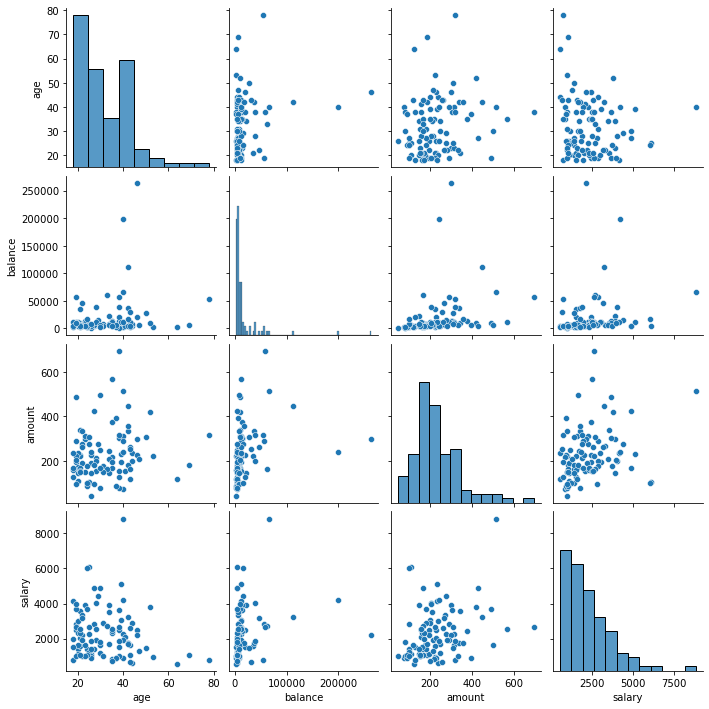

In [12]:
sns.pairplot(final_data)

## Salary v/s Age

<AxesSubplot:xlabel='age', ylabel='salary'>

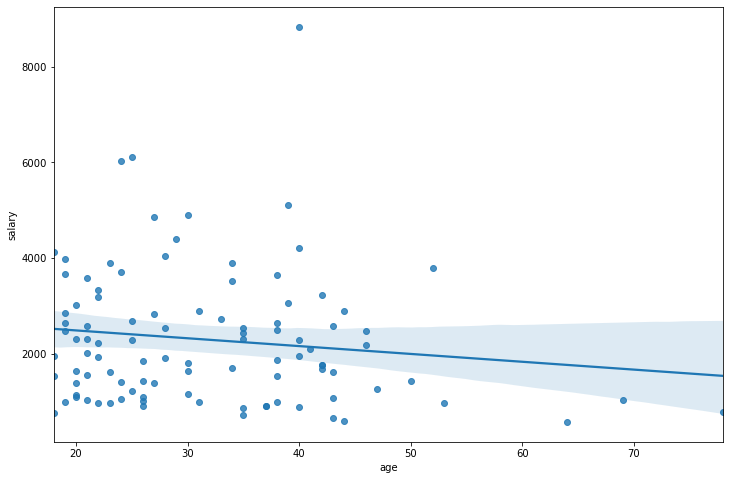

In [18]:
plt.figure(figsize=(12, 8))
sns.regplot(x="age", y="salary", data=final_data)

## Salary v/s Account Balance

<AxesSubplot:xlabel='balance', ylabel='salary'>

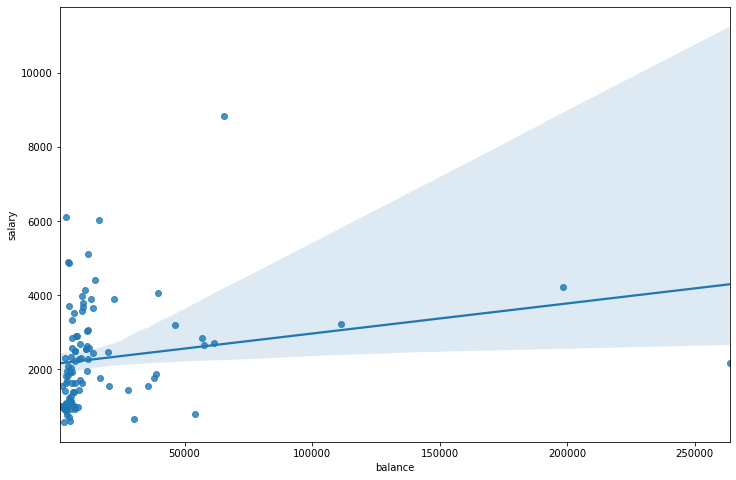

In [19]:
plt.figure(figsize=(12, 8))
sns.regplot(x="balance",y="salary", fit_reg=True, data=final_data)

## Salary v/s Transaction Amount

<AxesSubplot:xlabel='amount', ylabel='salary'>

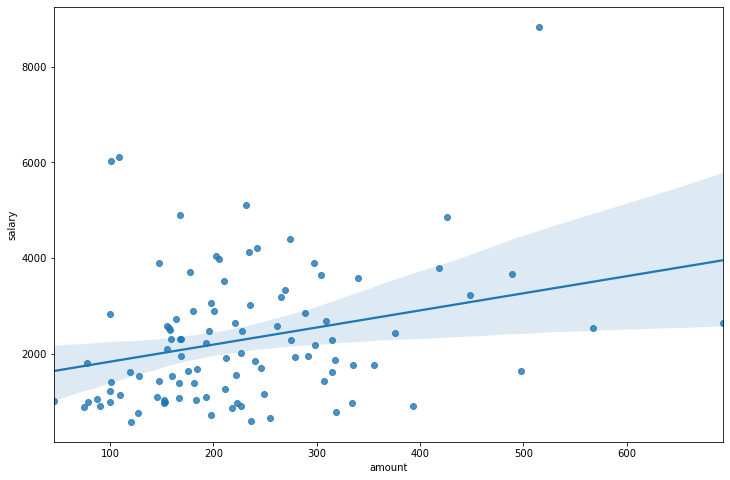

In [20]:
plt.figure(figsize=(12, 8))
sns.regplot(x="amount", y="salary", fit_reg=True, data=final_data)

## Data Preparation

### Mean POS (Point of Sale) for each customer

In [22]:
# POS indicates spending behavior of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})
pos.head()


customer_id        pos
0  CUS-1005756958  28.769615
1  CUS-1117979751  23.321923
2  CUS-1140341822  34.781282
3  CUS-1147642491  54.271316
4  CUS-1196156254  31.157432

### Mean payment made by the customer

In [23]:
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

payment.head()

customer_id     payment
0  CUS-1005756958  144.000000
1  CUS-1117979751   98.925000
2  CUS-1140341822  142.000000
3  CUS-1147642491   96.185185
4  CUS-1196156254   43.100000

### Mean Inter-bank transfer by each customer

In [24]:
interbank=data[data["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})
interbank.head()

customer_id  interbank
0  CUS-1117979751  1001.0000
1  CUS-1140341822    90.0000
2  CUS-1147642491   125.0000
3  CUS-1196156254   153.4000
4  CUS-1271030853    76.1875

### Mean phone transaction made by the customer

In [25]:
phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

phonebank.head()

customer_id  phonebank
0  CUS-1005756958      182.0
1  CUS-1646183815      150.0
2  CUS-1896554896     1916.0
3  CUS-2155701614       82.0
4  CUS-2348881191     1629.0

## Merging relevant dataframes

In [26]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

customer_id  age       balance
0  CUS-1005756958   53   2275.852055
1  CUS-1117979751   21   9829.929000
2  CUS-1140341822   28   5699.212250
3  CUS-1147642491   34   9032.841186
4  CUS-1196156254   34  22272.433755

In [28]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")
df.head()

customer_id  age       balance     payment        pos   salary
0  CUS-1005756958   53   2275.852055  144.000000  28.769615   970.47
1  CUS-1117979751   21   9829.929000   98.925000  23.321923  3578.65
2  CUS-1140341822   28   5699.212250  142.000000  34.781282  1916.51
3  CUS-1147642491   34   9032.841186   96.185185  54.271316  1711.39
4  CUS-1196156254   34  22272.433755   43.100000  31.157432  3903.73

In [52]:
cor=df.corr()
cor

age   balance   payment       pos    salary
age      1.000000  0.231963  0.063119  0.168038 -0.135264
balance  0.231963  1.000000 -0.060903  0.429417  0.205646
payment  0.063119 -0.060903  1.000000 -0.028869 -0.110899
pos      0.168038  0.429417 -0.028869  1.000000 -0.096478
salary  -0.135264  0.205646 -0.110899 -0.096478  1.000000

<AxesSubplot:>

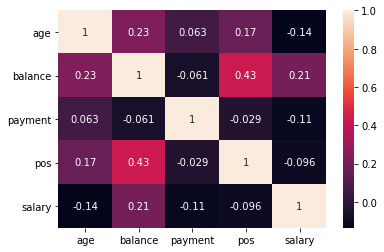

In [54]:
sns.heatmap(cor,annot=True)

## Linear Regression Model


In [32]:
X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=62)

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X, y)

0.11981809678208977

In [55]:
# r2 score
y_pred=lr.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, y_pred))


Coefficient of determination:  0.06330451659508474


In [34]:
# Sample prediction values

print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])


The model predicts salary will be=
1540.3316148934505


## Decision Tree Regressor

In [41]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [42]:
dt.predict(X_test)

array([1138.79, 2280.36, 3785.78, 1068.04, 2500.  , 3676.94, 8835.98,
        983.36, 4405.3 , 3231.26, 2443.24, 1843.14, 1396.23, 2854.74,
        916.75,  983.36, 6107.23, 1640.83, 2306.63, 2282.36])

In [43]:
dt.score(X_test, y_test)

-4.3057515830311575

In [44]:
# Sample prediction values

print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1272.4699999999998
